In [8]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/video_games_sales.csv').dropna()
df.to_csv('data/video_games_sales.csv')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [ ]:
df.shape

In [ ]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

In [ ]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot(rot=45)

In [ ]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

In [ ]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

In [ ]:
sns.displot(df.Critic_Score)

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values

In [ ]:
sns.boxplot(y='Platform', x='Critic_Score', data = df[df.Platform.isin(top_platforms)], orient='h')

In [ ]:
platform_genre_sales = df.pivot_table(
    index='Platform',
    columns='Genre',
    values='Global_Sales',
    aggfunc='sum',
    fill_value=0
).applymap(float)

sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

In [9]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

In [ ]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )

#визуализируем данные
iplot(data, show_link=False)

In [12]:
df = pd.read_csv('data/telecom_churn.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.Churn.value_counts()

Text(0.5, 1.0, 'Распределение оттока клиентов')

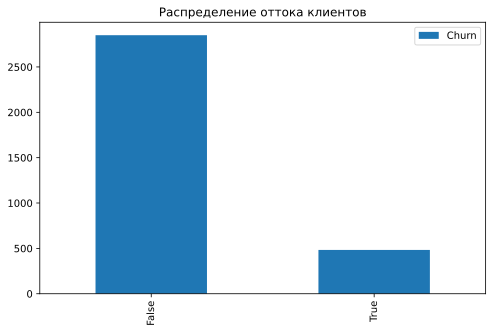

In [13]:
df.Churn.value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')

In [14]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()

In [ ]:
corr_matrix.head()

<AxesSubplot:>

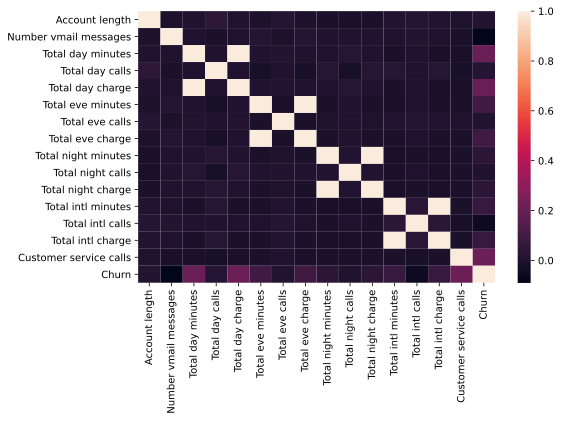

In [15]:
sns.heatmap(corr_matrix)

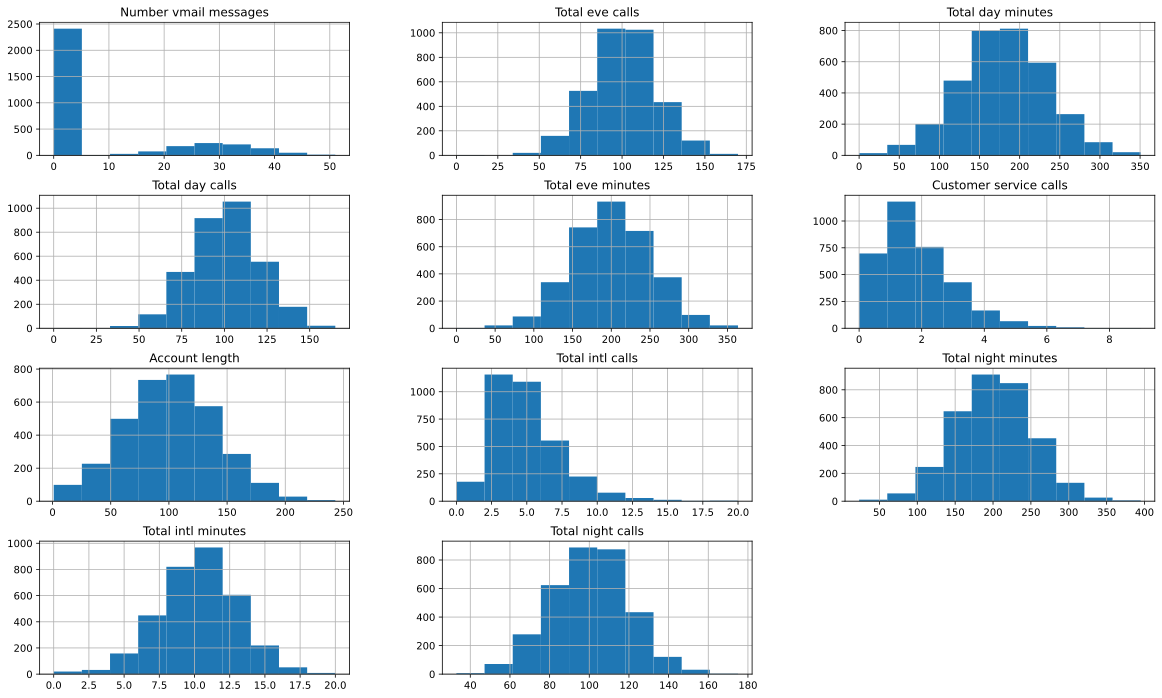

In [16]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

In [ ]:
#ломает VSCode

#sns_plot = sns.pairplot(df[features + ['Churn']], hue='Churn')
#sns_plot.savefig('super_plt.png')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

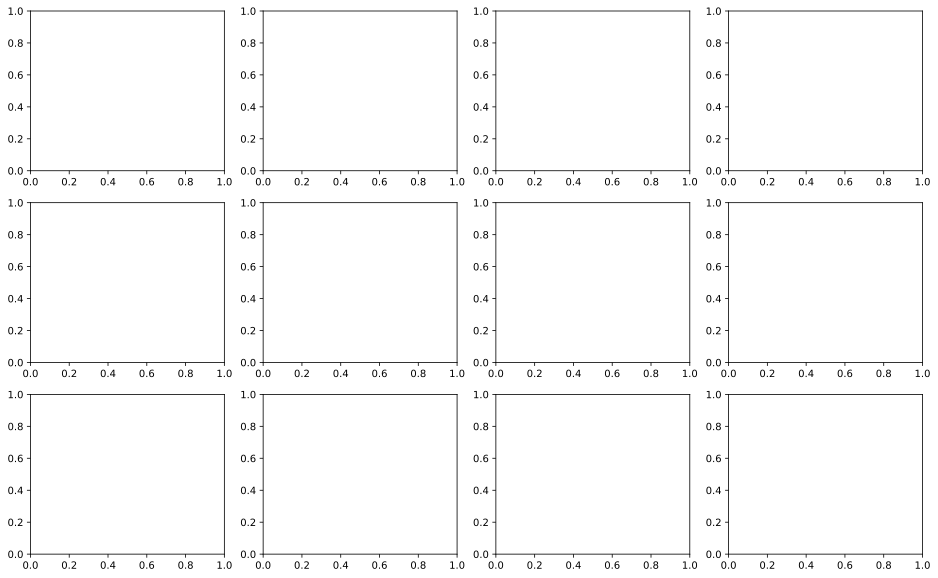

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('Churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);